<a href="https://colab.research.google.com/github/smreynolds92/Great-Learning/blob/main/NLP_Project_Full_Code_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Problem Statement**

### Business Context

The prices of the stocks of companies listed under a global exchange are influenced by a variety of factors, with the company's financial performance, innovations and collaborations, and market sentiment being factors that play a significant role. News and media reports can rapidly affect investor perceptions and, consequently, stock prices in the highly competitive financial industry. With the sheer volume of news and opinions from a wide variety of sources, investors and financial analysts often struggle to stay updated and accurately interpret its impact on the market. As a result, investment firms need sophisticated tools to analyze market sentiment and integrate this information into their investment strategies.

### Problem Definition

With an ever-rising number of news articles and opinions, an investment startup aims to leverage artificial intelligence to address the challenge of interpreting stock-related news and its impact on stock prices. They have collected historical daily news for a specific company listed under NASDAQ, along with data on its daily stock price and trade volumes.

As a member of the Data Science and AI team in the startup, you have been tasked with analyzing the data, developing an AI-driven sentiment analysis system that will automatically process and analyze news articles to gauge market sentiment, and summarizing the news at a weekly level to enhance the accuracy of their stock price predictions and optimize investment strategies. This will empower their financial analysts with actionable insights, leading to more informed investment decisions and improved client outcomes.

### Data Dictionary

* `Date` : The date the news was released
* `News` : The content of news articles that could potentially affect the company's stock price
* `Open` : The stock price (in \$) at the beginning of the day
* `High` : The highest stock price (in \$) reached during the day
* `Low` :  The lowest stock price (in \$) reached during the day
* `Close` : The adjusted stock price (in \$) at the end of the day
* `Volume` : The number of shares traded during the day
* `Label` : The sentiment polarity of the news content
    * 1: positive
    * 0: neutral
    * -1: negative

## **Please read the instructions carefully before starting the project.**

**Note**: If the free-tier GPU of Google Colab is not accessible (due to unavailability or exhaustion of daily limit or other reasons), the following steps can be taken:

1. Wait for 12-24 hours until the GPU is accessible again or the daily usage limits are reset.

2. Switch to a different Google account and resume working on the project from there.

3. Try using the CPU runtime:
    - To use the CPU runtime, click on *Runtime* => *Change runtime type* => *CPU* => *Save*
    - One can also click on the *Continue without GPU* option to switch to a CPU runtime (kindly refer to the snapshot below)
    - The instructions for running the code on the CPU are provided in the respective sections of the notebook.

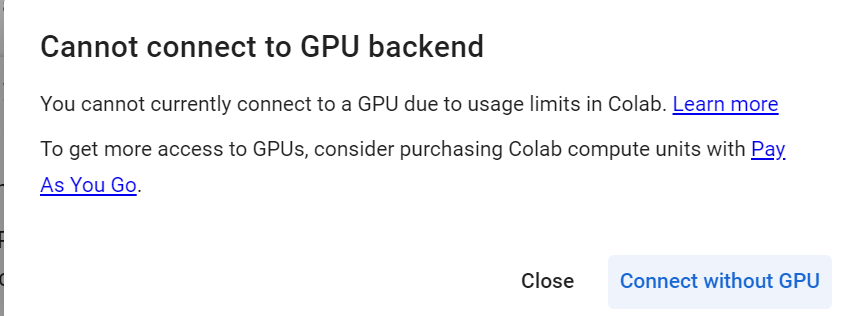

## **Installing and Importing Necessary Libraries**

*** I have used the class workbooks, my previous projects, and internet searches as an example for much of my coding in this project.

In [ ]:
# installing the sentence-transformers and gensim libraries for word embeddings
!pip install -U sentence-transformers gensim transformers tqdm -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.8/255.8 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 42.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 50.5 MB/s eta 0:00:00


**Observation:**
- Installing the pip for the sentence transformers.

In [ ]:
# To manipulate and analyze data
import pandas as pd
import numpy as np

# To connect to Google Colab drive
from google.colab import drive

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To visualize data
import matplotlib.pyplot as plt
import seaborn as sns

# To used time-related functions
import time

# To parse JSON data
import json

# To build, tune, and evaluate ML models
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import (
    GradientBoostingClassifier,
    RandomForestClassifier,
)

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    classification_report
)

# To load/create word embeddings
from gensim.models import (
    Word2Vec,
    KeyedVectors,
)

from gensim.scripts.glove2word2vec import glove2word2vec

# To work with transformer models
import torch
from sentence_transformers import SentenceTransformer

# To implement progress bar related functionalities
from tqdm import tqdm
tqdm.pandas()

# To ignore unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


**Observation:**
- Installing the necessary libraries.

## **Loading the dataset**

In [ ]:
# Connecting to google colab drive
drive.mount('/content/drive')

Mounted at /content/drive


**Observation:**
- Connecting to the google drive.

In [ ]:
# Importing the dataset
data1 = pd.read_csv('/content/drive/MyDrive/NLP-wk11/stock_news(1).csv')

**Observation:**
- Importing the data.

In [ ]:
# Copying data to another variable to avoid any changes to original data
stock_info = data1.copy()

**Observation:**
- Making a copy of the data, so that the original data remains the same.

## **Data Overview**

In [ ]:
# Check the top five records of the data
stock_info.head()

,Date,News,Open,High,Low,Close,Volume,Label
0,2019-01-02,The tech sector experienced a significant dec...,41.740002,42.244999,41.482498,40.246914,130672400,-1
1,2019-01-02,Apple lowered its fiscal Q1 revenue guidance ...,41.740002,42.244999,41.482498,40.246914,130672400,-1
2,2019-01-02,Apple cut its fiscal first quarter revenue fo...,41.740002,42.244999,41.482498,40.246914,130672400,-1
3,2019-01-02,This news article reports that yields on long...,41.740002,42.244999,41.482498,40.246914,130672400,-1
4,2019-01-02,Apple's revenue warning led to a decline in U...,41.740002,42.244999,41.482498,40.246914,130672400,-1


**Observation:**
- The data above shows an example of the 8 columns.

In [ ]:
# Showing the beginning and end of the columns in the data
stock_info

,Date,News,Open,High,Low,Close,Volume,Label
0,2019-01-02,The tech sector experienced a significant dec...,41.740002,42.244999,41.482498,40.246914,130672400,-1
1,2019-01-02,Apple lowered its fiscal Q1 revenue guidance ...,41.740002,42.244999,41.482498,40.246914,130672400,-1
2,2019-01-02,Apple cut its fiscal first quarter revenue fo...,41.740002,42.244999,41.482498,40.246914,130672400,-1
3,2019-01-02,This news article reports that yields on long...,41.740002,42.244999,41.482498,40.246914,130672400,-1
4,2019-01-02,Apple's revenue warning led to a decline in U...,41.740002,42.244999,41.482498,40.246914,130672400,-1
...,...,...,...,...,...,...,...,...
344,2019-04-30,"Media mogul Oprah Winfrey, known for influenc...",50.764999,50.849998,49.777500,48.708790,186139600,-1
345,2019-04-30,"European shares fell on Tuesday, with banks u...",50.764999,50.849998,49.777500,48.708790,186139600,-1
346,2019-04-30,This article reports that the S&P 500 reached...,50.764999,50.849998,49.777500,48.708790,186139600,-1
347,2019-04-30,The Federal Reserve is anticipated to keep in...,50.764999,50.849998,49.777500,48.708790,186139600,-1


**Observation:**
- The data shown above shows that there are 349 rows and 8 columns.

In [ ]:
# The number of columns and row in the data set
stock_info.shape

(349, 8)

**Observation:**
- The shape function shows again that there are 349 rows and 8 columns.

In [ ]:
# Method to check the info of the data
stock_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    349 non-null    object 
 1   News    349 non-null    object 
 2   Open    349 non-null    float64
 3   High    349 non-null    float64
 4   Low     349 non-null    float64
 5   Close   349 non-null    float64
 6   Volume  349 non-null    int64  
 7   Label   349 non-null    int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 21.9+ KB


**Observation:**
- The data has 8 columns with 2 columns being object type, 4 columns being float64 type, and 2 columns being int64 type.  All columns have 349 values, so all fields have an entry.

In [ ]:
# Checking for any missing values just in case
stock_info.isnull().sum()

,0
Date,0
News,0
Open,0
High,0
Low,0
Close,0
Volume,0
Label,0


**Observation:**
- The isnull().sum() shows hat there are no null values.

In [ ]:
# Checking for duplicate rows in the dataset
stock_info.duplicated().sum()

0

**Observation:**
- The duplicated().sum() shows that there are no duplicate rows.

In [ ]:
# Number of unique values in each column
stock_info.nunique()

,0
Date,71
News,349
Open,70
High,70
Low,71
Close,71
Volume,71
Label,3


**Observation:**
- The nunique() function shows that the News column has all 349 unique values, and the Date, Low, and Close have 71 values, and High and Low have 70 values, and finally Label has 3 values which is what is stated in the Data Dictionary.

In [ ]:
# Convert the 'Date' column in the 'stock' DataFrame to datetime format.
stock_info['Date'] = pd.to_datetime(stock_info['Date'])

**Observation:**
- The Date is converted from type object to datetime64[ns].

In [ ]:
# Method to check the info of the data
stock_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    349 non-null    datetime64[ns]
 1   News    349 non-null    object        
 2   Open    349 non-null    float64       
 3   High    349 non-null    float64       
 4   Low     349 non-null    float64       
 5   Close   349 non-null    float64       
 6   Volume  349 non-null    int64         
 7   Label   349 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 21.9+ KB


**Observation:**
- The Date is converted from type object to datetime64[ns], shown above, and all other values remain the same.

In [ ]:
# Let's check the summary statistics of the data
stock_info.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,349,2019-02-16 16:05:30.085959936,2019-01-02 00:00:00,2019-01-14 00:00:00,2019-02-05 00:00:00,2019-03-22 00:00:00,2019-04-30 00:00:00,NaN
Open,349.0,46.229233,37.567501,41.740002,45.974998,50.7075,66.817497,6.442817
High,349.0,46.700458,37.817501,42.244999,46.025002,50.849998,67.0625,6.507321
Low,349.0,45.745394,37.305,41.482498,45.639999,49.7775,65.862503,6.391976
Close,349.0,44.926317,36.254131,40.246914,44.596924,49.11079,64.805229,6.398338
Volume,349.0,128948236.103152,45448000.0,103272000.0,115627200.0,151125200.0,244439200.0,43170314.918964
Label,349.0,-0.054441,-1.0,-1.0,0.0,0.0,1.0,0.715119


**Observation:**
- The statistical data for the numerical values is shown above in the graph.

## **Exploratory Data Analysis**

### Univariate Analysis

* Distribution of individual variables
* Compute and check the distribution of the length of news content

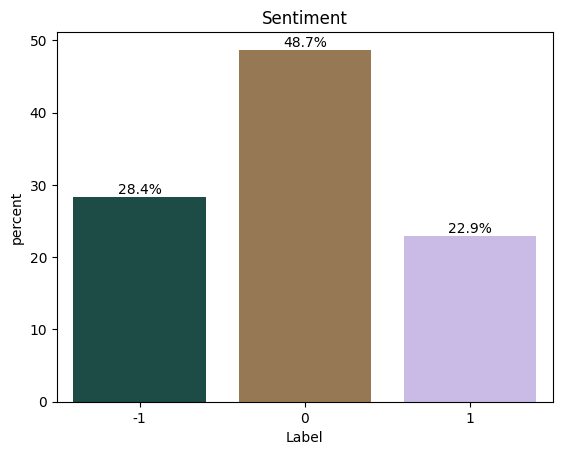

In [ ]:
# Showing the percentage for Negative, Neutral, and Positive feedback.
ax = sns.countplot(data=stock_info, x="Label", stat="percent", palette="cubehelix")
plt.title('Sentiment')

# Adding the percentage above each bar
for p in ax.patches:
    percent_value = p.get_height()  # Get the height as a percentage
    ax.annotate(f'{percent_value:.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')

plt.show()

**Observation:**
- The sentiment shows that about half of articles are neutral, and that the Negative and Positive responses are in the 20s, with Negative responses having about 5.5% more shown.  This data is not balanced.

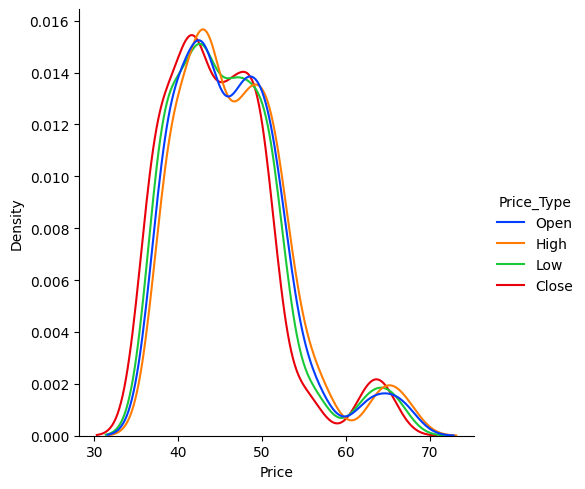

In [ ]:
# Melt the DataFrame to combine 'Open', 'High', 'Low', 'Close' into one column
stock_info_melted = pd.melt(stock_info[['Open', 'High', 'Low', 'Close']], var_name='Price_Type', value_name='Price')

# Plotting the density plot using the melted DataFrame, using 'Price' as the 'x' argument
sns.displot(data=stock_info_melted, x="Price", kind="kde", palette="bright", hue="Price_Type");

**Observation:**
- The density plot shows that Open, High, Low, and Close values seem to track fairly close.  The graph also shows a slight right skew.

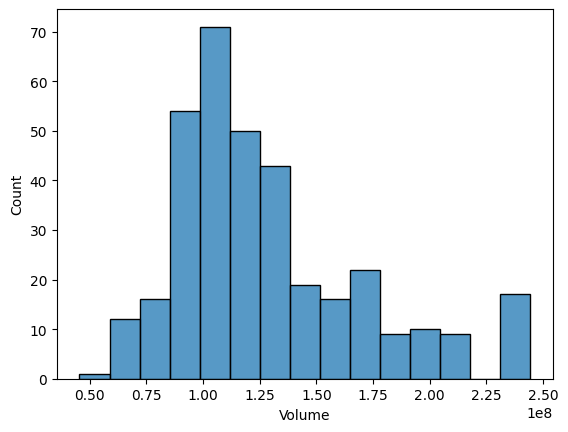

In [ ]:
# Histogram o the volume values
sns.histplot(stock_info, x='Volume');

**Observation:**
- The histogram of the Volume show the height around 1.00 and that the curve is slightly right skewed.

In [ ]:
# Calculating the total number of words present in the news content.
stock_info['news_len'] = stock_info['News'].apply(lambda x: len(x.split(' ')))

# Statistical summary for the news content length
stock_info['news_len'].describe()

,news_len
count,349.000000
mean,49.312321
std,5.727770
min,19.000000
25%,46.000000
50%,50.000000
75%,53.000000
max,61.000000


**Observation:**
- The statistics for the news_len shows that most articles are around 50, with the minimum being 19 and the max being 61.

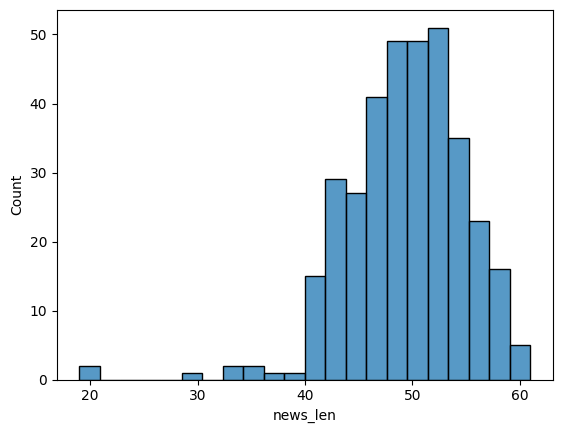

In [ ]:
# Histogram o the new news_len column
sns.histplot(data=stock_info,x="news_len");

**Observation:**
- The news_len shows that most articles are around 50, and that the curve is slightly left skewed.

### Bivariate Analysis

* Correlation
* Sentiment Polarity vs Price
* Date vs Price

**Note**: The above points are listed to provide guidance on how to approach bivariate analysis. Analysis has to be done beyond the above listed points to get maximum scores.

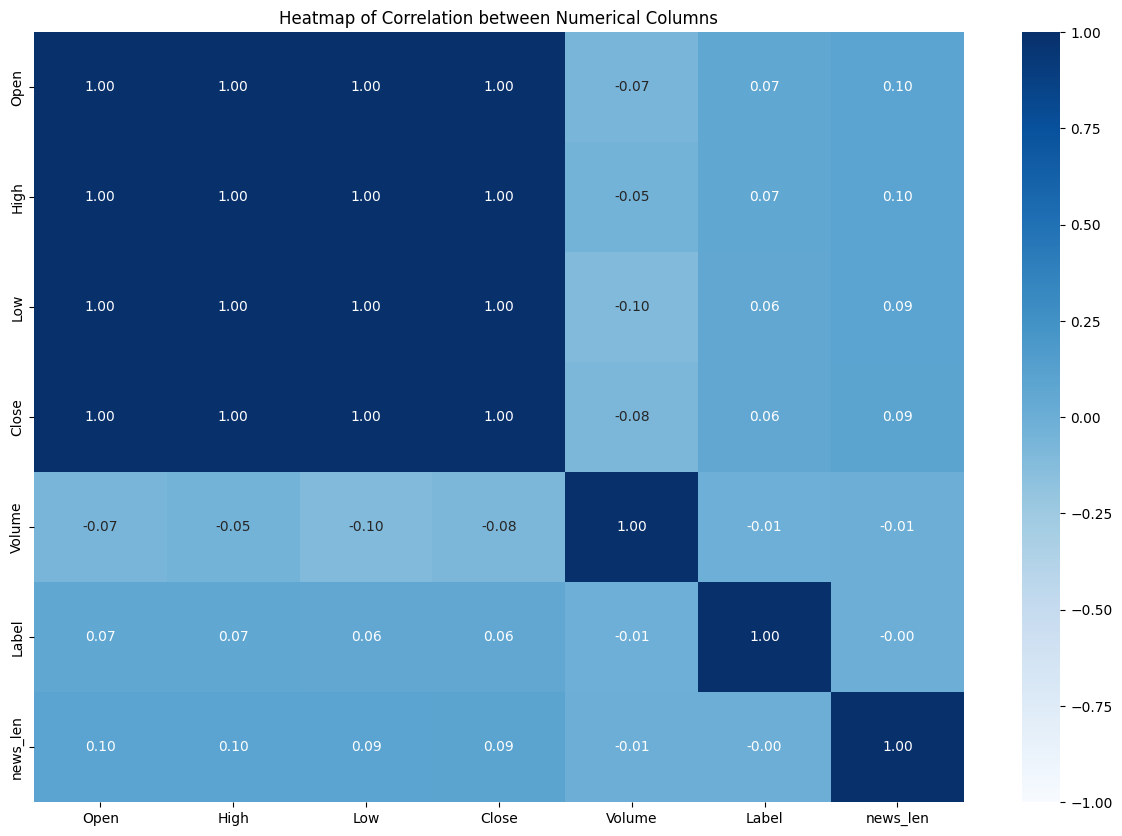

In [ ]:
# Heatmap to show the correlation between the numerical columns

plt.figure(figsize=(15,10))
sns.heatmap(stock_info.corr(numeric_only=True), annot=True, fmt=".2f", cmap='Blues', vmin=-1, vmax=1)
plt.title('Heatmap of Correlation between Numerical Columns')
plt.show()

**Observation:**
- This heatmap of the numerical values shows a strong positive correlation between Open, High, Low, and Close as also seen in the displot above in this workbook.  There is a low correlation between Open, High, Low, and Close and news_len and Label.  And there is a low negative correlation between Open, High, Low, and Close and Volume.

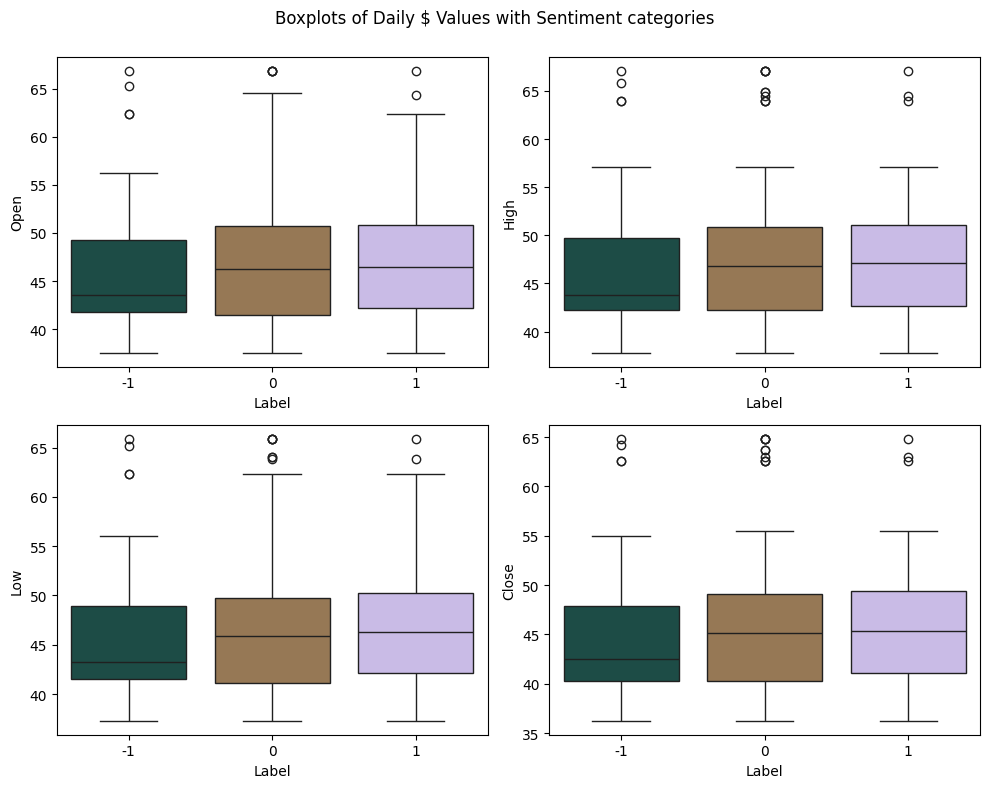

In [ ]:
# Boxplots of the Open, High, Low, and Close Daily $ Values

plt.figure(figsize=(10, 8))

for i, variable in enumerate(['Open', 'High', 'Low', 'Close']):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(data=stock_info, x="Label", y=variable, palette="cubehelix")
    plt.tight_layout(pad=2)

plt.suptitle('Boxplots of Daily $ Values with Sentiment categories', fontsize=12)

# Adjust layout to make space for the suptitle
plt.tight_layout(rect=[0, 0, 1, 0.98])

plt.show()

**Observation:**
- The box plots show a fairly close value between negative, neutral, and postive values for Open, High, Low, and Close.  It is noticable that all boxplots have some positive outliers.

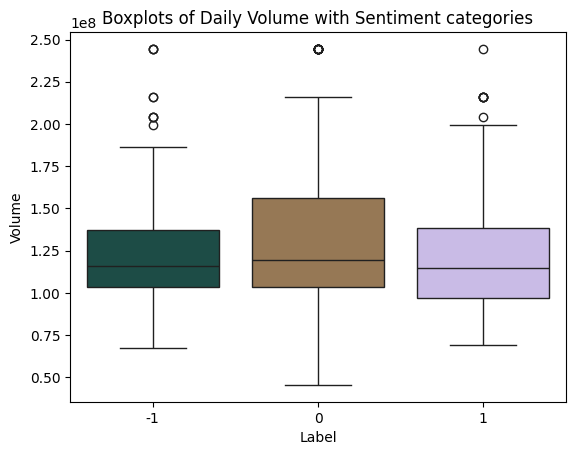

In [ ]:
# Boxplot of Label vs Volume
sns.boxplot(
    data=stock_info, x="Label", y="Volume", palette="cubehelix"
)
plt.title('Boxplots of Daily Volume with Sentiment categories')
plt.show()

**Observation:**
- The box plots show a fairly close value between negative, neutral, and postive for Daily Volume, with neutral having the largest range as expected from data shown above in this workbook.  It is noticable that all boxplots have some positive outliers.

In [ ]:
# Showing the Open, High, Low, Close, and Volume for the first few days of the list

stock_daily = stock_info.groupby('Date').agg(
    {
        'Open': 'mean',
        'High': 'mean',
        'Low': 'mean',
        'Close': 'mean',
        'Volume': 'mean',
    }
).reset_index()  # Reset index to keep 'Date' as a column

# Display the first few rows of the resulting DataFrame
print(stock_daily.head(10))


        Date       Open       High        Low      Close       Volume
0 2019-01-02  41.740002  42.244999  41.482498  40.246914  130672400.0
1 2019-01-03  43.570000  43.787498  43.222500  42.470604  103544800.0
2 2019-01-04  47.910000  47.919998  47.095001  46.419842  111448000.0
3 2019-01-07  50.792500  51.122501  50.162498  49.110790  109012000.0
4 2019-01-08  53.474998  54.507500  51.685001  50.787209  216071600.0
5 2019-01-10  56.267502  57.055000  56.049999  54.932766  139223200.0
6 2019-01-11  62.384998  63.982498  62.290001  62.571354  151125200.0
7 2019-01-14  37.712502  37.817501  37.305000  36.254131  129756800.0
8 2019-01-15  37.567501  38.347500  37.512501  36.996128  114843600.0
9 2019-01-16  38.270000  38.970001  38.250000  37.448109  122278800.0


**Observation:**
- Showing the top ten rows of the Date, Open, High, Low, Close, and Volume.    The Open, High, Low, and Close are fairly similar for each day.

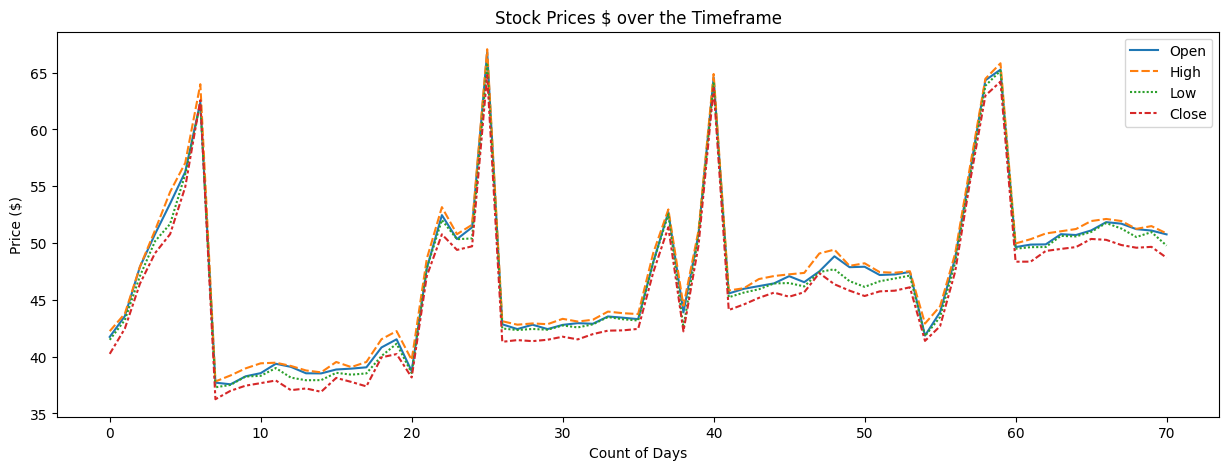

In [ ]:
# Lineplot of all the variables except Volume
plt.figure(figsize=(15, 5))
sns.lineplot(data=stock_daily.drop("Volume", axis=1))

plt.title('Stock Prices $ over the Timeframe')
plt.xlabel('Count of Days')  # Label for the x-axis
plt.ylabel('Price ($)')  # Label for the y-axis
plt.show()

**Observation:**
- Showing the plot of Open, High, Low, and Close vs. countof Days.

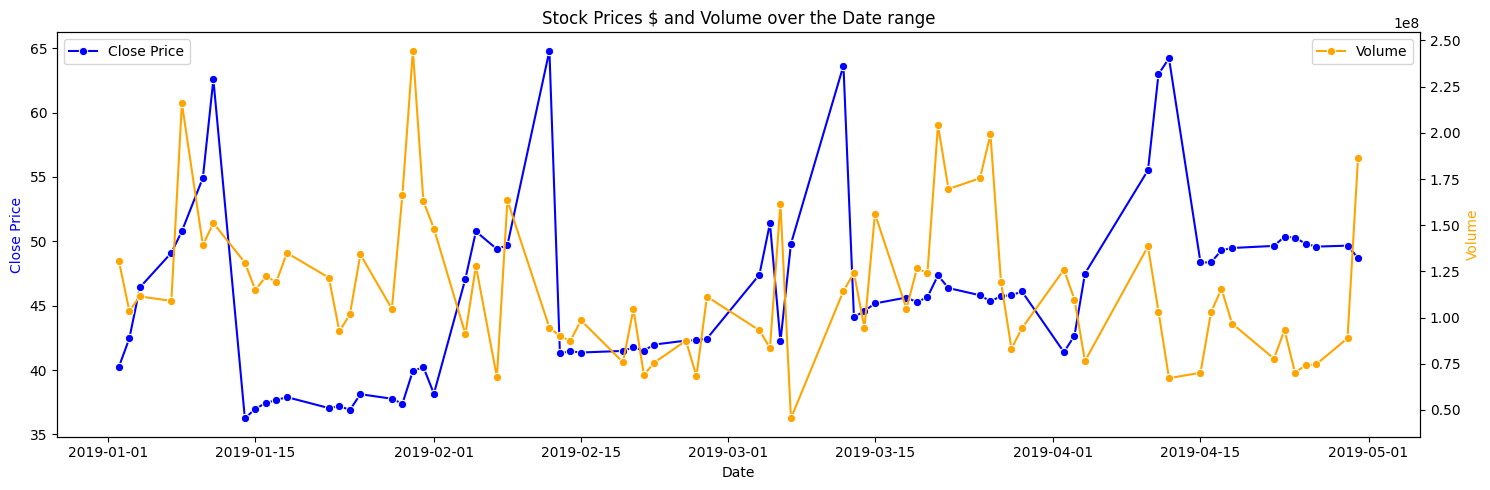

In [ ]:
# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(15,5))

# Lineplot on primary y-axis
sns.lineplot(data=stock_daily.reset_index(), x='Date', y='Close', ax=ax1, color='blue', marker='o', label='Close Price')

# Create a secondary y-axis
ax2 = ax1.twinx()

# Lineplot on secondary y-axis
sns.lineplot(data=stock_daily.reset_index(), x='Date', y='Volume', ax=ax2, color='orange', marker='o', label='Volume')

# Optionally set titles and labels
ax1.set_title('Stock Prices $ and Volume over the Date range')
ax1.set_ylabel('Close Price', color='blue')
ax2.set_ylabel('Volume', color='orange')

# Adjust legend to avoid overlap
ax1.legend(loc='upper left', bbox_to_anchor=(0, 1))  # Adjust this as necessary
ax2.legend(loc='upper right', bbox_to_anchor=(1, 1))  # Adjust this as necessary

# Show the plot
plt.tight_layout()
plt.show()

**Observation:**
- Comparing Closing Price and Volume over the entire date ranges.  There is a small negative correlation between the Closing Price and the Volume.

## **Data Preprocessing**

In [ ]:
# Print the statistical summary of the 'Date' column
stock_info["Date"].describe()

,Date
count,349
mean,2019-02-16 16:05:30.085959936
min,2019-01-02 00:00:00
25%,2019-01-14 00:00:00
50%,2019-02-05 00:00:00
75%,2019-03-22 00:00:00
max,2019-04-30 00:00:00


**Observation:**
- Reviewing the range of Dates so that the data can be split between train, val, and test.

In [ ]:
# Select all rows where the 'Date' is before '2019-04-01'
X_train = stock_info[(stock_info['Date'] < '2019-04-01')].reset_index()
# Select all rows where the 'Date' is from '2019-04-01 to '2019-04-16' (excluded)
X_val = stock_info[(stock_info['Date'] >= '2019-04-01') & (stock_info['Date'] < '2019-04-16')].reset_index()
# Select all rows where the 'Date' is from '2019-04-16' till the end.
X_test = stock_info[stock_info['Date'] >= '2019-04-16'].reset_index()

**Observation:**
- Splitting the data between train, val, and test using the Dates.

In [ ]:
# Choosing the 'Label' column as the target variable
y_train = X_train["Label"].copy()
y_val = X_val["Label"].copy()
y_test = X_test["Label"].copy()

**Observation:**
- Creating the y train, val, and test values for Label, based on the X train, val, and test percentage of Date ranges.

In [ ]:
# Printing the shape of X_train,X_val,X_test,y_train,y_val and y_test
print("Train data shape",X_train.shape)
print("Validation data shape",X_val.shape)
print("Test data shape ",X_test.shape)

print("Train label shape",y_train.shape)
print("Validation label shape",y_val.shape)
print("Test label shape ",y_test.shape)

Train data shape (286, 10)
Validation data shape (21, 10)
Test data shape  (42, 10)
Train label shape (286,)
Validation label shape (21,)
Test label shape  (42,)


**Observation:**
- Showing the shape of the split data.  The train has about 82%, the val has about 6%, and the test has about 12% of the data.

In [ ]:
# Showing the first 5 rows of the X_train variable
X_train.head()

,index,Date,News,Open,High,Low,Close,Volume,Label,news_len
0,0,2019-01-02,The tech sector experienced a significant dec...,41.740002,42.244999,41.482498,40.246914,130672400,-1,46
1,1,2019-01-02,Apple lowered its fiscal Q1 revenue guidance ...,41.740002,42.244999,41.482498,40.246914,130672400,-1,51
2,2,2019-01-02,Apple cut its fiscal first quarter revenue fo...,41.740002,42.244999,41.482498,40.246914,130672400,-1,49
3,3,2019-01-02,This news article reports that yields on long...,41.740002,42.244999,41.482498,40.246914,130672400,-1,51
4,4,2019-01-02,Apple's revenue warning led to a decline in U...,41.740002,42.244999,41.482498,40.246914,130672400,-1,50


**Observation:**
- Showing the first 5 rows of the X_train data.

In [ ]:
# Showing the first 5 rows of the y_train variable
y_train.head()

,Label
0,-1
1,-1
2,-1
3,-1
4,-1


**Observation:**
- Showing the first 5 rows of the y_train data.

## **Word Embeddings**

### Word2Vec

In [ ]:
# Creating a list of all words in our data
words_list = [item.split(" ") for item in stock_info['News'].values]

**Observation:**
- Creating a list of all the words for the Word2Vec.

In [ ]:
# Creating an instance of Word2Vec
vec_size = 300
model_W2V = Word2Vec(words_list, vector_size = vec_size, min_count = 1, window=5, workers = 6)

**Observation:**
- Setting the vector size to 300 and creating an instance of Word2Vec including other parameters.

In [ ]:
# Checking the size of the vocabulary
print("Length of the vocabulary is", len(list(model_W2V.wv.key_to_index)))

Length of the vocabulary is 4682


**Observation:**
- Showing that the size of the Word2Vec model is 4682.

In [ ]:
# Checking the word embedding of a random word
word = "holdings"
model_W2V.wv[word]

array([-3.02713597e-03,  2.58558500e-03,  1.13464671e-03, -2.77223857e-03,
       -1.34688511e-03, -2.30565248e-03,  2.71109748e-03,  1.02734845e-03,
       -8.06105323e-04, -1.39748154e-03, -9.34412528e-04, -2.85762688e-03,
        3.26156104e-03, -2.85383221e-03, -1.31394237e-03,  3.33200529e-04,
        1.00381067e-03,  1.32303627e-03,  3.09640844e-03, -2.74249609e-03,
        2.51534162e-04, -2.14700797e-03, -1.25919445e-03,  2.28565442e-03,
       -1.31350092e-03, -1.64712116e-03, -3.40472348e-03, -3.04183201e-03,
        1.11251371e-03, -1.09657343e-03, -6.23002124e-04,  3.00001906e-04,
       -9.09331196e-04, -3.04484367e-03,  1.49530696e-03, -1.23609195e-03,
       -1.10832718e-03, -3.61838448e-03,  1.45270361e-03, -1.03052345e-03,
       -3.23232193e-03,  1.55838660e-03,  5.79936663e-04,  4.44022007e-04,
       -2.73341779e-03,  3.26285092e-03,  2.75592692e-03, -2.20510317e-03,
        2.31375871e-03,  2.37350585e-03, -1.09829300e-03, -2.43133563e-03,
       -3.41042085e-03, -

**Observation:**
- Checking the word embedding of the word holdings.

In [ ]:
# Checking the word embedding of a random word
word = "revenue"
model_W2V.wv[word]

array([ 2.71941419e-03,  5.63953519e-02,  1.11912412e-03,  3.18762027e-02,
       -8.42074677e-03, -6.20529652e-02,  4.43308130e-02,  1.08025707e-01,
        7.71669252e-03, -1.86608229e-02,  1.62803456e-02, -2.74109095e-02,
        6.83115097e-04,  1.15898671e-02, -3.39876562e-02, -4.01422456e-02,
        3.05484943e-02, -1.92983001e-02,  4.31038300e-03, -1.74139403e-02,
       -3.25792916e-02,  5.45783587e-05,  5.03018983e-02,  6.96372706e-03,
        2.08073165e-02,  1.02924369e-03, -5.57072461e-02,  7.38685532e-03,
       -2.37245299e-02, -4.89704497e-02,  1.73284579e-02, -2.66903602e-02,
        5.94255421e-03, -2.10046652e-03, -6.55717542e-03,  1.52369449e-02,
        1.99797153e-02, -4.80395257e-02,  9.65391111e-04, -9.86431446e-03,
       -2.02988591e-02, -6.35591429e-03,  1.72855321e-03, -3.37527208e-02,
        1.64406337e-02,  5.22157587e-02, -3.36140976e-03,  1.16124302e-02,
       -4.82535549e-03,  4.07012887e-02,  2.12812703e-02,  1.18348384e-02,
       -2.41977274e-02,  

**Observation:**
- Checking the word embedding of the word revenue.

In [ ]:
# Retrieving the words present in the Word2Vec model's vocabulary
words = list(model_W2V.wv.key_to_index.keys())

# Retrieving word vectors for all the words present in the model's vocabulary
wvs = model_W2V.wv[words].tolist()

# Creating a dictionary of words and their corresponding vectors
word_vector_dict = dict(zip(words, wvs))

**Observation:**
- Creating the word vector dictionary for the Word2Vec model.

In [ ]:
# Creating a function to create an average vetorizer for Word2Vec
def average_vectorizer_Word2Vec(doc):
    # Initializing a feature vector for the sentence
    feature_vector = np.zeros((vec_size,), dtype="float64")

    # Creating a list of words in the sentence that are present in the model vocabulary
    words_in_vocab = [word for word in doc.split() if word in words]

    # adding the vector representations of the words
    for word in words_in_vocab:
        feature_vector += np.array(word_vector_dict[word])

    # Dividing by the number of words to get the average vector
    if len(words_in_vocab) != 0:
        feature_vector /= len(words_in_vocab)

    return feature_vector

**Observation:**
- A function is created to return the average vectorizer for Word2Vec.

In [ ]:
# Creating a dataframe of the vectorized documents
start = time.time()

X_train_wv = pd.DataFrame(X_train["News"].apply(average_vectorizer_Word2Vec).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])
X_val_wv = pd.DataFrame(X_val["News"].apply(average_vectorizer_Word2Vec).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])
X_test_wv = pd.DataFrame(X_test["News"].apply(average_vectorizer_Word2Vec).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])

end = time.time()
print('Time taken ', (end-start))

Time taken  0.5142433643341064


**Observation:**
- Creating the dataframes for the vectorized documents in Word2Vec.  Notice that the time taken to complete this task is around 0.51.

In [ ]:
# Printing the shape of the X_ for train, val, and test
print(X_train_wv.shape, X_val_wv.shape, X_test_wv.shape)

(286, 300) (21, 300) (42, 300)


**Observation:**
- Showing the shape of the X_ train, val, and test.  Notice that the vector size is 300.

### GloVe

In [ ]:
# Loading the Stanford GloVe model
filename = '/content/drive/MyDrive/NLP-wk11/glove.6B.100d.txt.word2vec'
glove_model = KeyedVectors.load_word2vec_format(filename, binary=False)

**Observation:**
- Loading the Stanford GloVe model.

In [ ]:
# Checking the size of the vocabulary
print("Length of the vocabulary is", len(glove_model.index_to_key))

Length of the vocabulary is 400000


**Observation:**
- The length of the model vocabulary is 400000.

In [ ]:
# Checking the word embedding of a random word
word = "holdings"
glove_model[word]

array([ 0.25984  , -0.43898  , -0.25629  ,  0.19414  ,  0.46787  ,
       -0.92237  , -0.41731  , -0.27714  , -0.27805  , -0.095195 ,
        0.83814  ,  0.2226   ,  0.080573 , -0.20037  , -0.21896  ,
       -0.8964   ,  0.59334  ,  0.32744  ,  0.71826  ,  0.057449 ,
        0.30114  , -0.13734  , -0.44826  ,  0.53159  , -0.10549  ,
        0.05318  ,  0.47191  ,  0.35237  , -0.55397  , -0.083511 ,
        0.45043  ,  0.41707  , -0.43356  , -0.17575  ,  0.085298 ,
        0.22008  ,  1.2723   ,  0.47295  , -0.80874  , -0.70589  ,
        0.82007  , -0.69493  , -0.32516  , -0.29436  , -0.06848  ,
        0.35001  ,  0.088831 ,  0.89304  ,  0.27391  , -0.92486  ,
       -0.29962  ,  0.5325   ,  0.45946  ,  0.30513  ,  0.4584   ,
       -0.77935  , -0.40308  , -0.50062  ,  1.7354   ,  0.49087  ,
        0.74121  , -0.0040855,  0.2789   ,  0.24632  ,  0.048054 ,
       -0.081113 ,  0.76783  ,  1.2236   ,  1.2144   ,  0.12876  ,
       -0.34967  ,  0.14138  , -0.22962  , -0.49602  , -0.7039

**Observation:**
- Checking the word embedding of the word holdings.  Also, it is notable that this is different from the same word in the Word2Vec model.

In [ ]:
# Checking the word embedding of a random word
word = "revenue"
glove_model[word]

array([ 0.17132  , -0.042936 ,  0.48587  , -0.49912  ,  0.83222  ,
       -0.79533  , -0.39641  ,  0.0059214,  0.065537 , -0.35212  ,
        0.40528  , -0.12115  , -0.15325  , -0.46874  ,  0.2268   ,
       -0.80513  ,  0.065305 ,  0.25888  ,  0.4961   ,  1.0646   ,
        0.14317  ,  0.11955  , -0.35765  ,  1.0962   , -0.57384  ,
       -0.62014  ,  0.54423  , -0.20712  , -0.67822  , -0.82173  ,
        0.6037   ,  0.26209  , -0.18882  , -0.90291  , -0.181    ,
        0.43017  , -0.30814  ,  0.15839  , -0.0065962, -0.20375  ,
        0.52302  , -0.75001  , -0.35737  ,  0.38933  ,  0.2421   ,
       -0.1404   , -0.19481  , -0.97056  , -0.169    , -1.1695   ,
        0.089281 , -0.098044 ,  0.5469   ,  0.888    ,  0.42843  ,
       -1.8364   ,  0.083037 , -0.59659  ,  2.2736   ,  0.21042  ,
        0.21198  , -1.0437   , -0.66913  ,  0.5043   , -0.44588  ,
       -0.025209 , -0.1372   , -0.15207  ,  1.482    , -0.17329  ,
        0.69726  , -0.10271  ,  0.37622  , -0.016729 ,  0.1806

**Observation:**
- Checking the word embedding of the word revenue.  Also, it is notable that this is different from the same word in the Word2Vec model.

In [ ]:
# Retrieving the words present in the GloVe model's vocabulary
glove_words = glove_model.index_to_key

# Creating a dictionary of words and their corresponding vectors
glove_word_vector_dict = dict(zip(glove_model.index_to_key,list(glove_model.vectors)))

**Observation:**
- Retrieving the words from the GloVe model vocabulary and creating the dictionary of words and vectors.

In [ ]:
# Setting the vector size
vec_size=100

**Observation:**
- Setting the vector size to 100.

In [ ]:
def average_vectorizer_GloVe(doc):
    # Initializing a feature vector for the sentence
    feature_vector = np.zeros((vec_size,), dtype="float64")

    # Creating a list of words in the sentence that are present in the model vocabulary
    words_in_vocab = [word for word in doc.split() if word in glove_words]

    # adding the vector representations of the words
    for word in words_in_vocab:
        feature_vector += np.array(glove_word_vector_dict[word])

    # Dividing by the number of words to get the average vector
    if len(words_in_vocab) != 0:
        feature_vector /= len(words_in_vocab)

    return feature_vector

**Observation:**
- A function is created to return the average vectorizer for GloVe.

In [ ]:
# Creating a dataframe of the vectorized documents
start = time.time()

X_train_gl = pd.DataFrame(X_train["News"].apply(average_vectorizer_GloVe).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])
X_val_gl = pd.DataFrame(X_val["News"].apply(average_vectorizer_GloVe).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])
X_test_gl = pd.DataFrame(X_test["News"].apply(average_vectorizer_GloVe).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])

end = time.time()
print('Time taken ', (end-start))

Time taken  32.3803505897522


**Observation:**
- Creating the dataframes for the vectorized documents in GloVe.  Notice that the time taken to complete this task is around 31.07.

In [ ]:
# Printing the shape of the X_ for train, val, and test
print(X_train_gl.shape, X_val_gl.shape, X_test_gl.shape)

(286, 100) (21, 100) (42, 100)


**Observation:**
- Showing the shape of the X_ train, val, and test.  Notice that the vector size is 100.

### Sentence Transformer

#### Defining the model

In [ ]:
#Defining the model
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

**Observation:**
- Defining the model for the Sentence Transformer model.

#### Encoding the dataset

In [ ]:
# Setting the device to GPU if available, else CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

**Observation:**
- Setting the device for GPU if available, in not then it defaults to cpu.

In [ ]:
# Encoding the dataset
start = time.time()

X_train_st = model.encode(X_train["News"].values, show_progress_bar=True, device=device) #Complete the code to apply Sentence Transformer on 'News' column
X_val_st = model.encode(X_val["News"].values, show_progress_bar=True, device=device) #Complete the code to apply Sentence Transformer on 'News' column
X_test_st = model.encode(X_test["News"].values, show_progress_bar=True, device=device) #Complete the code to apply Sentence Transformer on 'News' column

end = time.time()
print("Time taken ",(end-start))

Batches:   0%|          | 0/9 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Time taken  3.864527940750122


**Observation:**
- Creating the dataframes for the vectorized documents in the Sentence Transformer.  Notice that the time taken to complete this task is around 1.64.

In [ ]:
# Printing the shape of the X_ for train, val, and test
print(X_train_st.shape, X_val_st.shape, X_test_st.shape) #Complete the code to print the shapes of the final dataframes

(286, 384) (21, 384) (42, 384)


**Observation:**
- Showing the shape of the X_ train, val, and test.  Notice that the vector size is 384.

## **Sentiment Analysis**

### Model Evaluation Criterion

- Checking 3 different base models (Word2Vec, GloVe, and Sentence Transformers) and 3 different tuned models (Word2Vec, GloVe, and Sentence Transformers) on 3 different classifiers (Gradient Boost, Random Forest, and Decision Tree) to determine which works best for Sentiment Analysis in this workbook.


### Utility Functions

In [ ]:
# Creating a function to plot the confusion matrix
def make_confusion_matrix(model, predictors, target):

    # Make predictions using the classifier.
    pred = model.predict(predictors)

    #Printing the classification report
    print(classification_report(target, pred))

    cm = confusion_matrix(target, pred)
    label_list = ['Negative', 'Neutral', 'Positive']
    plt.figure(figsize = (5, 4))

    sns.heatmap(cm, annot = True,  fmt = '.0f', cmap='Blues', xticklabels = label_list, yticklabels = label_list)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()

**Observation:**
- Function to create a confusion matrix and classification report.

In [ ]:
# Create a function to collect the performance of the different models
def model_performance_classification_sklearn(model, predictors, target):
    """
    Compute various performance metrics for a classification model using sklearn.

    Parameters:
    model (sklearn classifier): The classification model to evaluate.
    predictors (array-like): The independent variables used for predictions.
    target (array-like): The true labels for the dependent variable.

    Returns:
    pandas.DataFrame: A DataFrame containing the computed metrics (Accuracy, Recall, Precision, F1-score).
    """

    # Make predictions using the classifier.
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # Compute Accuracy.
    recall = recall_score(target, pred,average='weighted')  # Compute Recall.
    precision = precision_score(target, pred,average='weighted')  # Compute Precision.
    f1 = f1_score(target, pred,average='weighted')  # Compute F1-score.

    # Create a DataFrame to store the computed metrics.
    df_perf = pd.DataFrame(
        {
            "Accuracy": [acc],
            "Recall": [recall],
            "Precision": [precision],
            "F1": [f1],
        }
    )

    # Return the DataFrame with the metrics.
    return df_perf

**Observation:**
- Function to collect the performance of the different models to be reviewed.

### Base Model - Word2Vec

In [ ]:
# Building the model

#Uncomment only one of the snippets related to fitting the model to the data

#base_wv = GradientBoostingClassifier(random_state = 42)
base_wv = RandomForestClassifier(random_state=42)
#base_wv = DecisionTreeClassifier(random_state=42)

# Fitting on train data
base_wv.fit(X_train_wv, y_train)

RandomForestClassifier(random_state=42)

**Observation:**
- Testing the 3 different classifiers for the base Word2Vec model.  I finally chose the Random Forest model for all six models, because it had the best results for all models except for this one, but I wanted to keep the comparisons from the same classifier.

Training performance:

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        82
           0       1.00      1.00      1.00       138
           1       1.00      1.00      1.00        66

    accuracy                           1.00       286
   macro avg       1.00      1.00      1.00       286
weighted avg       1.00      1.00      1.00       286



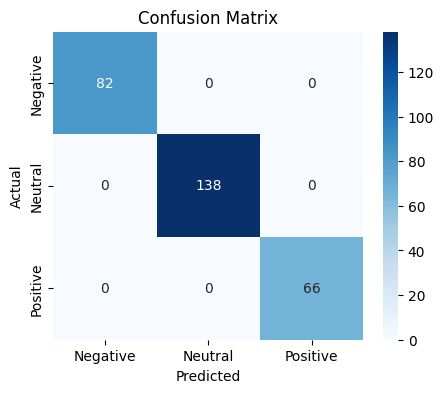

In [ ]:
#Calculating different metrics on training data
base_train_wv = model_performance_classification_sklearn(base_wv,X_train_wv,y_train)
print("Training performance:\n")
make_confusion_matrix(base_wv,X_train_wv,y_train)

**Observation:**
- The training model is overfit with all scores at 100%.

Validation performance:

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         4
           0       0.47      0.67      0.55        12
           1       0.00      0.00      0.00         5

    accuracy                           0.38        21
   macro avg       0.16      0.22      0.18        21
weighted avg       0.27      0.38      0.32        21



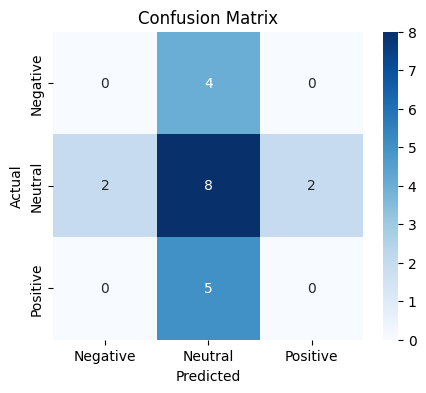

In [ ]:
#Calculating different metrics on validation data
base_val_wv = model_performance_classification_sklearn(base_wv,X_val_wv,y_val)
print("Validation performance:\n")
make_confusion_matrix(base_wv,X_val_wv,y_val)

**Observation:**
- The Validation model has 0% f1-score for both Negative and Positive values, and 55% f1-score for Neutral values.

### Base Model - GloVe

In [ ]:
#Building the model

#Uncomment only one of the snippets related to fitting the model to the data

#base_wv = GradientBoostingClassifier(random_state = 42)
base_wv = RandomForestClassifier(random_state=42)
#base_wv = DecisionTreeClassifier(random_state=42)

# Fitting on train data
base_wv.fit(X_train_gl, y_train)

RandomForestClassifier(random_state=42)

**Observation:**
- Testing the 3 different classifiers for the base GloVe model.  I finally chose the Random Forest model for all six models, because it had the best results for 5 of the six models.

Training performance:

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        82
           0       1.00      1.00      1.00       138
           1       1.00      1.00      1.00        66

    accuracy                           1.00       286
   macro avg       1.00      1.00      1.00       286
weighted avg       1.00      1.00      1.00       286



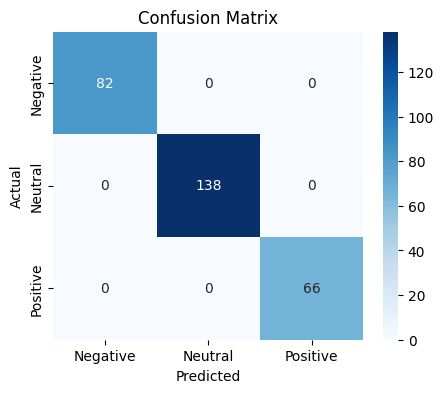

In [ ]:
#Calculating different metrics on training data
base_train_gl = model_performance_classification_sklearn(base_wv,X_train_gl,y_train)
print("Training performance:\n")
make_confusion_matrix(base_wv,X_train_gl,y_train)

**Observation:**
- The training model is overfit with all scores at 100%.

Validation performance:

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         4
           0       0.56      0.75      0.64        12
           1       0.33      0.20      0.25         5

    accuracy                           0.48        21
   macro avg       0.30      0.32      0.30        21
weighted avg       0.40      0.48      0.43        21



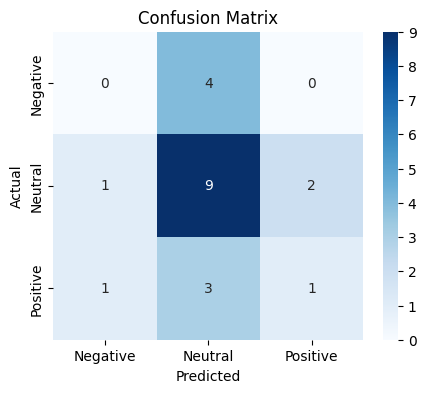

In [ ]:
#Calculating different metrics on validation data
base_val_gl = model_performance_classification_sklearn(base_wv,X_val_gl,y_val)
print("Validation performance:\n")
make_confusion_matrix(base_wv,X_val_gl,y_val)

**Observation:**
- The Validation model has 0% f1-score for Negative values, and has 25% for Positive values, and 64% f1-score for Neutral values.

### Base Model - Sentence Transformer

In [ ]:
# Building the model

#Uncomment only one of the snippets related to fitting the model to the data

#base_wv = GradientBoostingClassifier(random_state = 42)
base_wv = RandomForestClassifier(random_state=42)
#base_wv = DecisionTreeClassifier(random_state=42)

# Fitting on train data
base_wv.fit(X_train_st, y_train)

RandomForestClassifier(random_state=42)

**Observation:**
- Testing the 3 different classifiers for the base Sentence Transformer model.  I finally chose the Random Forest model for all six models, because it had the best results for 5 of the six models.

Training performance:

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        82
           0       1.00      1.00      1.00       138
           1       1.00      1.00      1.00        66

    accuracy                           1.00       286
   macro avg       1.00      1.00      1.00       286
weighted avg       1.00      1.00      1.00       286



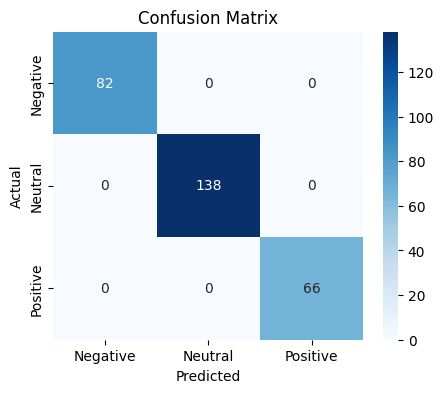

In [ ]:
#Calculating different metrics on training data
base_train_st = model_performance_classification_sklearn(base_wv,X_train_st,y_train)
print("Training performance:\n")
make_confusion_matrix(base_wv,X_train_st,y_train)

**Observation:**
- The training model is overfit with all scores at 100%.

Validation performance:

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         4
           0       0.55      0.92      0.69        12
           1       0.00      0.00      0.00         5

    accuracy                           0.52        21
   macro avg       0.18      0.31      0.23        21
weighted avg       0.31      0.52      0.39        21



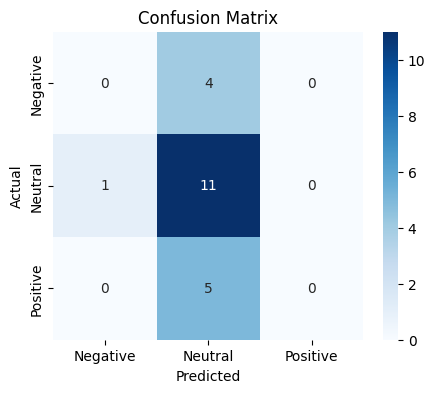

In [ ]:
#Calculating different metrics on validation data
base_val_st = model_performance_classification_sklearn(base_wv,X_val_st,y_val)
print("Validation performance:\n")
make_confusion_matrix(base_wv,X_val_st,y_val)

**Observation:**
- The Validation model has 0% f1-score for both Negative and  Positive values, and 69% f1-score for Neutral values.

### Tuned Model - Word2Vec

**Note**: The parameter grid provided below is a sample grid. It can be modified depending on the compute power of the system being used.

In [ ]:
# Tuned Word2Vec Model
start = time.time()

# Choose the type of classifier.

#Uncomment only one of the snippets corrrsponding to the base model trained previously

#tuned_wv = GradientBoostingClassifier(random_state = 42)
tuned_wv = RandomForestClassifier(random_state=42)
#tuned_wv = DecisionTreeClassifier(random_state=42)


parameters = {
    'max_depth': np.arange(3,7),
    'min_samples_split': np.arange(5,12,2),
    'max_features': ['log2', 'sqrt', 0.2, 0.4]
}

# Run the grid search
grid_obj = GridSearchCV(tuned_wv, parameters, scoring='f1_weighted',cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train_wv, y_train)

end = time.time()
print("Time taken ",(end-start))

# Set the clf to the best combination of parameters
tuned_wv = grid_obj.best_estimator_

Time taken  138.84644556045532


**Observation:**
- Testing the 3 different classifiers for the tuned Word2Vec model.  I finally chose the Random Forest model for all six models, because it had the best results for 5 of the six models.  For the tuned model the Gradient Boost took the most time, the Random Forest took the mid level time, and the Decision Tree took the least amount of time.  The Random Forest for this model took approximately 138.85.

In [ ]:
# Fit the best algorithm to the data.
tuned_wv.fit(X_train_wv, y_train)

RandomForestClassifier(max_depth=6, min_samples_split=11, random_state=42)

**Observation:**
- Fitting the tuned Word2Vec model.

Training performance:

              precision    recall  f1-score   support

          -1       0.97      0.94      0.96        82
           0       0.89      1.00      0.94       138
           1       0.98      0.77      0.86        66

    accuracy                           0.93       286
   macro avg       0.95      0.90      0.92       286
weighted avg       0.94      0.93      0.93       286



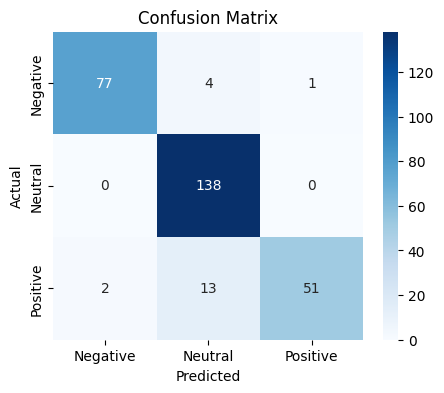

In [ ]:
#Calculating different metrics on training data
tuned_train_wv = model_performance_classification_sklearn(tuned_wv,X_train_wv,y_train)
print("Training performance:\n")
make_confusion_matrix(tuned_wv,X_train_wv,y_train)

**Observation:**
- The Training model has 96% f1-score for Negative values, and has 86% for Positive values, and 94% f1-score for Neutral values.

Validation performance:

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         4
           0       0.50      0.75      0.60        12
           1       0.00      0.00      0.00         5

    accuracy                           0.43        21
   macro avg       0.17      0.25      0.20        21
weighted avg       0.29      0.43      0.34        21



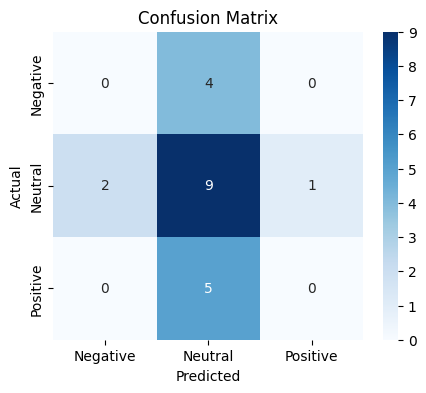

In [ ]:
#Calculating different metrics on validation data
tuned_val_wv = model_performance_classification_sklearn(tuned_wv,X_val_wv,y_val)
print("Validation performance:\n")
make_confusion_matrix(tuned_wv,X_val_wv,y_val)

**Observation:**
- The Training model has 0% f1-score for Negative and Positive values, and 60% f1-score for Neutral values.

### Tuned Model - GloVe

In [ ]:
# Tuned GloVe Model
start = time.time()

#Uncomment only one of the snippets corrrsponding to the base model trained previously

#tuned_wv = GradientBoostingClassifier(random_state = 42)
tuned_wv = RandomForestClassifier(random_state=42)
#tuned_wv = DecisionTreeClassifier(random_state=42)

parameters = {
    'max_depth': np.arange(3,7),
    'min_samples_split': np.arange(5,12,2),
    'max_features': ['log2', 'sqrt', 0.2, 0.4]
}

# Run the grid search
grid_obj = GridSearchCV(tuned_wv, parameters, scoring='f1_weighted',cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train_gl, y_train)

end = time.time()
print("Time taken ",(end-start))

# Set the clf to the best combination of parameters
tuned_gl = grid_obj.best_estimator_

Time taken  83.62255954742432


**Observation:**
- Testing the 3 different classifiers for the tuned GloVe model.  I finally chose the Random Forest model for all six models, because it had the best results for 5 of the six models.  For the tuned model the Gradient Boost took the most time, the Random Forest took the mid level time, and the Decision Tree took the least amount of time.  The Random Forest for this model took approximately 83.62.

In [ ]:
# Fit the best algorithm to the data.
tuned_gl.fit(X_train_gl, y_train)

RandomForestClassifier(max_depth=6, max_features=0.2, min_samples_split=7,
                       random_state=42)

**Observation:**
- Fitting the tuned GloVe model.

Training performance:

              precision    recall  f1-score   support

          -1       0.99      0.96      0.98        82
           0       0.97      1.00      0.98       138
           1       1.00      0.95      0.98        66

    accuracy                           0.98       286
   macro avg       0.98      0.97      0.98       286
weighted avg       0.98      0.98      0.98       286



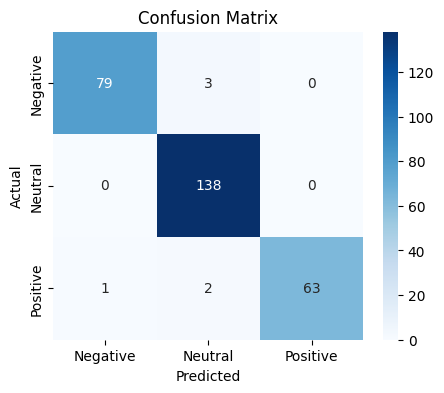

In [ ]:
#Calculating different metrics on training data
tuned_train_gl = model_performance_classification_sklearn(tuned_gl,X_train_gl,y_train)
print("Training performance:\n")
make_confusion_matrix(tuned_gl,X_train_gl,y_train)

**Observation:**
- The Training model has 98% f1-score for Negative, Positive, and for Neutral values.

Validation performance:

              precision    recall  f1-score   support

          -1       0.33      0.25      0.29         4
           0       0.62      0.83      0.71        12
           1       0.50      0.20      0.29         5

    accuracy                           0.57        21
   macro avg       0.49      0.43      0.43        21
weighted avg       0.54      0.57      0.53        21



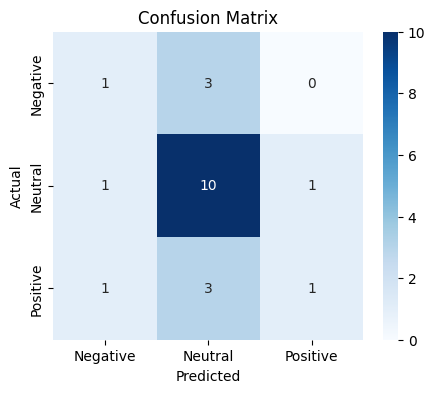

In [ ]:
#Calculating different metrics on validation data
tuned_val_gl = model_performance_classification_sklearn(tuned_gl,X_val_gl,y_val)
print("Validation performance:\n")
make_confusion_matrix(tuned_gl,X_val_gl,y_val)

**Observation:**
- The Training model has 29% f1-score for Negative and for Positive values, and 71% f1-score for Neutral values.

### Tuned Model - Sentence Transformer

In [ ]:
# Tuned Sentence Transformer Model
start = time.time()

# Choose the type of classifier.

#Uncomment only one of the snippets corrrsponding to the base model trained previously

#tuned_wv = GradientBoostingClassifier(random_state = 42)
tuned_wv = RandomForestClassifier(random_state=42)
#tuned_wv = DecisionTreeClassifier(random_state=42)

parameters = {
    'max_depth': np.arange(3,7),
    'min_samples_split': np.arange(5,12,2),
    'max_features': ['log2', 'sqrt', 0.2, 0.4]
}

# Run the grid search
grid_obj = GridSearchCV(tuned_wv, parameters, scoring='f1_weighted',cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train_st, y_train)

end = time.time()
print("Time taken ",(end-start))

# Set the clf to the best combination of parameters
tuned_st = grid_obj.best_estimator_

Time taken  159.10834741592407


**Observation:**
- Testing the 3 different classifiers for the tuned Sentence Transformer model.  I finally chose the Random Forest model for all six models, because it had the best results for 5 of the six models.  For the tuned model the Gradient Boost took the most time, the Random Forest took the mid level time, and the Decision Tree took the least amount of time.  The Random Forest for this model took approximately 159.11.

In [ ]:
# Fit the best algorithm to the data.
tuned_st.fit(X_train_st, y_train)

RandomForestClassifier(max_depth=5, max_features=0.4, min_samples_split=9,
                       random_state=42)

**Observation:**
- Fitting the tuned Sentence Transformer model.

Training performance:

              precision    recall  f1-score   support

          -1       0.99      0.96      0.98        82
           0       0.98      1.00      0.99       138
           1       1.00      0.98      0.99        66

    accuracy                           0.99       286
   macro avg       0.99      0.98      0.99       286
weighted avg       0.99      0.99      0.99       286



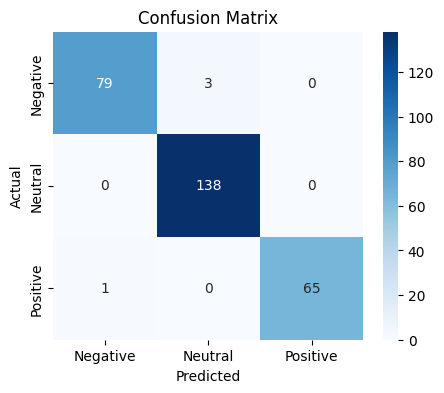

In [ ]:
#Calculating different metrics on training data
tuned_train_st = model_performance_classification_sklearn(tuned_st,X_train_st,y_train)
print("Training performance:\n")
make_confusion_matrix(tuned_st,X_train_st,y_train)

**Observation:**
- The Training model has 98% f1-score for Negative values, and has 99% f1-score for Positive values and for Neutral values.

Validation performance:

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         4
           0       0.57      1.00      0.73        12
           1       0.00      0.00      0.00         5

    accuracy                           0.57        21
   macro avg       0.19      0.33      0.24        21
weighted avg       0.33      0.57      0.42        21



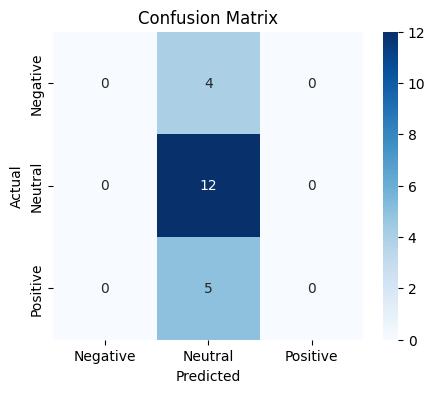

In [ ]:
#Calculating different metrics on validation data
tuned_val_st = model_performance_classification_sklearn(tuned_st,X_val_st,y_val)
print("Validation performance:\n")
make_confusion_matrix(tuned_st,X_val_st,y_val)

**Observation:**
- The Training model has 0% f1-score for Negative and for Positive values, and 73% f1-score for Neutral values.

### Model Performance Summary and Final Model Selection

In [ ]:
#training performance comparison

models_train_comp_df = pd.concat(
    [base_train_wv,
     base_train_gl,
     base_train_st,
     tuned_train_wv,
     tuned_train_gl,
     tuned_train_st,
    ],axis=0
)

models_train_comp_df.index = [
    "Base Model (Word2Vec)",
    "Base Model (GloVe)",
    "Base Model (Sentence Transformer)",
    "Tuned Model (Word2Vec)",
    "Tuned Model (GloVe)",
    "Tuned Model (Sentence Transformer)",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Accuracy,Recall,Precision,F1
Base Model (Word2Vec),1.000000,1.000000,1.000000,1.000000
Base Model (GloVe),1.000000,1.000000,1.000000,1.000000
Base Model (Sentence Transformer),1.000000,1.000000,1.000000,1.000000
Tuned Model (Word2Vec),0.930070,0.930070,0.935382,0.928248
Tuned Model (GloVe),0.979021,0.979021,0.979545,0.978968
Tuned Model (Sentence Transformer),0.986014,0.986014,0.986150,0.985971


**Observation:**
- This show the weighted results from the 6 different training models for the Random Forest Classifier.  The 3 base models are overfit and the tuned models are all in the 90s percentiles.

In [ ]:
#validation performance comparison

models_val_comp_df = pd.concat(
    [base_val_wv,
     base_val_gl,
     base_val_st,
     tuned_val_wv,
     tuned_val_gl,
     tuned_val_st,
     ],axis=0
)

models_val_comp_df.index = [
    "Base Model (Word2Vec)",
    "Base Model (GloVe)",
    "Base Model (Sentence Transformer)",
    "Tuned Model (Word2Vec)",
    "Tuned Model (GloVe)",
    "Tuned Model (Sentence Transformer)",
]

print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,Accuracy,Recall,Precision,F1
Base Model (Word2Vec),0.380952,0.380952,0.268908,0.315271
Base Model (GloVe),0.476190,0.476190,0.400794,0.426871
Base Model (Sentence Transformer),0.523810,0.523810,0.314286,0.392857
Tuned Model (Word2Vec),0.428571,0.428571,0.285714,0.342857
Tuned Model (GloVe),0.571429,0.571429,0.539683,0.530612
Tuned Model (Sentence Transformer),0.571429,0.571429,0.326531,0.415584


**Observation:**
- This show the weighted results from the 6 different validation models for the Random Forest Classifier.  The best overall model is the Tuned Model (GloVe).  It has both the highest number and the numbers are closest in consistency.

### Model Performance Check on Test Data

Test performance for the final model:

              precision    recall  f1-score   support

          -1       0.50      0.23      0.32        13
           0       0.50      0.85      0.63        20
           1       0.50      0.11      0.18         9

    accuracy                           0.50        42
   macro avg       0.50      0.40      0.38        42
weighted avg       0.50      0.50      0.44        42



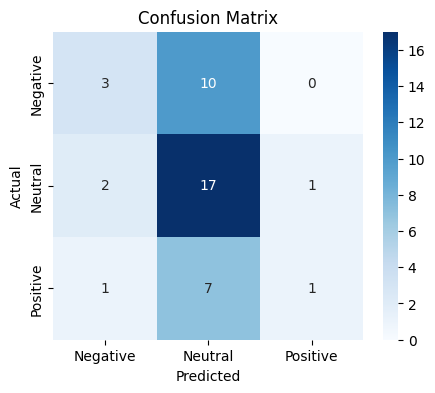

In [ ]:
#Calculating different metrics on validation data
final_model_test = model_performance_classification_sklearn(tuned_gl,X_test_gl,y_test)
print("Test performance for the final model:\n")
make_confusion_matrix(tuned_gl,X_test_gl,y_test)

**Observation:**
- This show the results from the test model for the Random Forest Classifier for the Tuned Model (GloVe).  This was the best model chosen from the 6 models.  The f1-score for negative responses is 32%, the f1-score for positive responses is 18%, and the f1-score for the neutral responses is 63%.

In [ ]:
# Showing the weighted averages for the test data using the best performing model
print("Test performance for the final model showing weighted averages is:\n",final_model_test)

Test performance for the final model showing weighted averages is:
    Accuracy  Recall  Precision        F1
0       0.5     0.5        0.5  0.436529


**Observation:**
- The weighted responses for the test perforance of the Tuned Model (GloVe) using the Random Forest Classifier is Recall 50%, Precision 50 %, F1 43.7%.  The Accuracy is also 50%.

## **Weekly News Summarization**

**Important Note**: It is recommended to run this section of the project independently from the previous sections in order to avoid runtime crashes due to RAM overload.

#### Installing and Importing the necessary libraries

In [ ]:
# Installation for GPU llama-cpp-python
# uncomment and run the following code in case GPU is being used
!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python==0.1.85 --force-reinstall --no-cache-dir -q

# Installation for CPU llama-cpp-python
# uncomment and run the following code in case GPU is not being used
#!CMAKE_ARGS="-DLLAMA_CUBLAS=off" FORCE_CMAKE=1 pip install llama-cpp-python==0.1.85 --force-reinstall --no-cache-dir -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 30.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 129.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 258.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 253.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cupy-cuda12x 12.2.0 requires numpy<1.27,>=1.20, but you have numpy 2.1.2 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.1.2 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.1.2 which is incompatible.
pytensor 2.25.5 requires numpy<2,>=1.17.0, but you have numpy 2.1.2 which is incompatible.
tens

**Observation:**
- Installing GPU for llama.

In [ ]:
# Importing the library for data manipulation
import pandas as pd
import numpy as np

# Import the drive function from the google.colab module
from google.colab import drive

# To used time-related functions
import time

# Function to download the model from the Hugging Face model hub
from huggingface_hub import hf_hub_download

# Importing the Llama class from the llama_cpp module
from llama_cpp import Llama

# For progress bar related functionalities
from tqdm import tqdm
tqdm.pandas()

# To ignore unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

**Observation:**
- Importing the necessary libraries.

#### Loading the data

In [ ]:
# Connecting to google colab drive
drive.mount('/content/drive')

Mounted at /content/drive


**Observation:**
- Connecting to the drive.

In [ ]:
# Importing the dataset
stock_news = pd.read_csv('/content/drive/MyDrive/NLP-wk11/stock_news(1).csv')

**Observation:**
- Importing the dataset.

In [ ]:
# Copying data to another variable to avoid any changes to original data
data = stock_news.copy()

**Observation:**
- Making a copy of the data, so that the original data remains the same.

#### Loading the model

In [ ]:
# Choosing the model to use
model_name_or_path = "TheBloke/Mistral-7B-Instruct-v0.2-GGUF"
model_basename = "mistral-7b-instruct-v0.2.Q6_K.gguf"


model_path = hf_hub_download(
    repo_id=model_name_or_path,
    filename=model_basename
)

mistral-7b-instruct-v0.2.Q6_K.gguf:   0%|          | 0.00/5.94G [00:00<?, ?B/s]

**Observation:**
- Loading the model for the weekly news summarization.

In [ ]:
# Uncomment the below snippet of code if the runtime is connected to GPU.
llm = Llama(
    model_path=model_path, # Path to the model
    n_gpu_layers=100, # Number of layers transferred to GPU
    n_ctx=4500, # Context window
)

AVX = 1 | AVX2 = 1 | AVX512 = 0 | AVX512_VBMI = 0 | AVX512_VNNI = 0 | FMA = 1 | NEON = 0 | ARM_FMA = 0 | F16C = 1 | FP16_VA = 0 | WASM_SIMD = 0 | BLAS = 1 | SSE3 = 1 | SSSE3 = 1 | VSX = 0 | 


**Observation:**
- Connecting the llm to the GPU.

In [ ]:
# Uncomment and run the following code in case GPU is not being used

# llm = Llama(
#     model_path=model_path, # Path to the model
#     n_ctx=4500, # Context window
#     n_cores=-2 # Number of CPU cores to use
# )

#### Aggregating the data weekly

In [ ]:
# Converting the 'Date' column to datetime format
data["Date"] = pd.to_datetime(data['Date'])

**Observation:**
- Converting the Date from type object to datetime64[ns].

In [ ]:
# Group the data by week using the 'Date' column.
weekly_grouped = data.groupby(pd.Grouper(key='Date', freq='W'))

**Observation:**
- Groping the News article data to weekly data.

In [ ]:
# Aggregate the grouped data on a weekly basis:
# concatenate 'content' values into a single string separated by ' || '.
weekly_grouped = weekly_grouped.agg(
    {
        'News': lambda x: ' || '.join(x)  # Join the news values with ' || ' separator.
    }
).reset_index()

print(weekly_grouped.shape)

(18, 2)


**Observation:**
- Showing the shape new weekly_grouped data.  There are 18 rows and 2 columns.

In [ ]:
# Showing the grouped News data
weekly_grouped

,Date,News
0,2019-01-06,The tech sector experienced a significant dec...
1,2019-01-13,Sprint and Samsung plan to release 5G smartph...
2,2019-01-20,The U.S. stock market declined on Monday as c...
3,2019-01-27,"The Swiss National Bank (SNB) governor, Andre..."
4,2019-02-03,Caterpillar Inc reported lower-than-expected ...
5,2019-02-10,"The Dow Jones Industrial Average, S&P 500, an..."
6,2019-02-17,"This week, the European Union's second highes..."
7,2019-02-24,This news article discusses progress towards ...
8,2019-03-03,The Dow Jones Industrial Average and other ma...
9,2019-03-10,"Spotify, the world's largest paid music strea..."


**Observation:**
- Showing the weekly_grouped data.  There are 18 rows and 2 columns.

In [ ]:
# Creating a copy of the data
data_1 = weekly_grouped.copy()

**Observation:**
- Creating a copy of the new weekly_grouped data, so that the original data remains the same.

#### Summarization

**Note**:

- The model is expected to summarize the news from the week by identifying the top three positive and negative events that are most likely to impact the price of the stock.

- As an output, the model is expected to return a JSON containing two keys, one for Positive Events and one for Negative Events.

For the project, we need to define the prompt to be fed to the LLM to help it understand the task to perform. The following should be the components of the prompt:

1. **Role**: Specifies the role the LLM will be taking up to perform the specified task, along with any specific details regarding the role

  - **Example**: `You are an expert data analyst specializing in news content analysis.`

2. **Task**: Specifies the task to be performed and outlines what needs to be accomplished, clearly defining the objective

  - **Example**: `Analyze the provided news headline and return the main topics contained within it.`

3. **Instructions**: Provides detailed guidelines on how to perform the task, which includes steps, rules, and criteria to ensure the task is executed correctly

  - **Example**:

```
Instructions:
1. Read the news headline carefully.
2. Identify the main subjects or entities mentioned in the headline.
3. Determine the key events or actions described in the headline.
4. Extract relevant keywords that represent the topics.
5. List the topics in a concise manner.
```

4. **Output Format**: Specifies the format in which the final response should be structured, ensuring consistency and clarity in the generated output

  - **Example**: `Return the output in JSON format with keys as the topic number and values as the actual topic.`

**Full Prompt Example**:

```
You are an expert data analyst specializing in news content analysis.

Task: Analyze the provided news headline and return the main topics contained within it.

Instructions:
1. Read the news headline carefully.
2. Identify the main subjects or entities mentioned in the headline.
3. Determine the key events or actions described in the headline.
4. Extract relevant keywords that represent the topics.
5. List the topics in a concise manner.

Return the output in JSON format with keys as the topic number and values as the actual topic.
```

**Sample Output**:

`{"1": "Politics", "2": "Economy", "3": "Health" }`

##### Utility Functions

In [ ]:
# defining a function to parse the JSON output from the model
def extract_json_data(json_str):
    import json
    try:
        # Find the indices of the opening and closing curly braces
        json_start = json_str.find('{')
        json_end = json_str.rfind('}')

        if json_start != -1 and json_end != -1:
            extracted_category = json_str[json_start:json_end + 1]  # Extract the JSON object
            data_dict = json.loads(extracted_category)
            return data_dict
        else:
            print(f"Warning: JSON object not found in response: {json_str}")
            return {}
    except json.JSONDecodeError as e:
        print(f"Error parsing JSON: {e}")
        return {}

**Observation:**
- Function to extract the JSON data.

##### Defining the response function

In [ ]:
#Defining the response function
def response_mistral_1(prompt, news):
    model_output = llm(
      f"""
      [INST]
      {prompt}
      News Articles: {news}
      [/INST]
      """,
      max_tokens=1024,
      temperature=0,
      top_p=0.95,
      top_k=50,
      echo=False,
    )

    final_output = model_output["choices"][0]["text"]

    return final_output

**Observation:**
- Function defining the response.

##### Checking the model output on a sample

In [ ]:
# Collecting the model sample at the position listed below
news = data_1.loc[0, 'News']

**Observation:**
- Collecting the News data from the first row.

In [ ]:
# Showing the length and weekly text for the model sample
print(len(news.split(' ')))
news

2611


' The tech sector experienced a significant decline in the aftermarket following Apple\'s Q1 revenue warning. Notable suppliers, including Skyworks, Broadcom, Lumentum, Qorvo, and TSMC, saw their stocks drop in response to Apple\'s downward revision of its revenue expectations for the quarter, previously announced in January. ||  Apple lowered its fiscal Q1 revenue guidance to $84 billion from earlier estimates of $89-$93 billion due to weaker than expected iPhone sales. The announcement caused a significant drop in Apple\'s stock price and negatively impacted related suppliers, leading to broader market declines for tech indices such as Nasdaq 10 ||  Apple cut its fiscal first quarter revenue forecast from $89-$93 billion to $84 billion due to weaker demand in China and fewer iPhone upgrades. CEO Tim Cook also mentioned constrained sales of Airpods and Macbooks. Apple\'s shares fell 8.5% in post market trading, while Asian suppliers like Hon ||  This news article reports that yields o

**Observation:**
- Showing the length of the News - 2611 and the data for the first row.

In [ ]:
# Creating a promt to get the top 3 positive and negative events for each week for the stock market
prompt = """
You are an expert data analyst specializing in news content analysis.

Task: Analyze the provided news headline and return the main topics contained within it.

Instructions:
1. Read the news headline carefully.
2. Identify the main subjects or entities mentioned in the headline that could affect stock price.
3. Determine the key events or actions described in the headline that could affect stock price.
4. Extract relevant keywords that represent the topics for stock prices.
5. List the topics in a concise manner.


Please create a JSON that has 2 root object keys:

Week Positive Events
Week Negative Events


For - Week Positive Events provide a list of the top 3 positive topics as single word answers.

For - Week Negative Events provide a list of the top 3 negative topics as single word answers.

There should only be 3 answers for Week Positive Events and 3 answers for Week Negative Events, and no notes or explanations or comments.

Do not include any other text in the output except the JSON.
"""

**Observation:**
- Prompt created to collect the 3 top positive and 3 top negative events from the News.

In [ ]:
# Showing an exaple of the top 3 positive and negative events summary from the dataset
%%time
summary = response_mistral_1(prompt, news)
print(summary)

 {
         "Week Positive Events": ["tech sector recovery", "Apple Services revenue", "USD JPY pair recovery"],
         "Week Negative Events": ["global economic slowdown", "Apple iPhone sales weakness", "China trade tensions"]
       }
CPU times: user 9.48 s, sys: 5.14 s, total: 14.6 s
Wall time: 14.8 s


**Observation:**
- Showing an example of the Week Positive Events and Week Negative Events summary from the dataset.

##### Checking the model output on the weekly data

In [ ]:
# Collecting the top 3 positive and negative events for each week
%%time
data_1['Key Events'] = data_1['News'].progress_apply(lambda x: response_mistral_1(prompt,x))

100%|██████████| 18/18 [01:51<00:00,  6.22s/it]

CPU times: user 1min 24s, sys: 24.8 s, total: 1min 49s
Wall time: 1min 51s


**Observation:**
- Collecting the Week Positive Events and Week Negative Events for all 18 rows.

In [ ]:
# Showing the top 5 rows of the Key Events
data_1["Key Events"].head() #Complete the code to print the first 5 rows of the 'Key_Events' column

,Key Events
0,"{\n ""Week Positive Events"": [""tech se..."
1,"{\n ""Week Positive Events"": [""5G smar..."
2,"{\n ""Week Positive Events"": [""tech s..."
3,"{\n ""Week Positive Events"": [""SNB gov..."
4,"{\n ""Week Positive Events"": [""Apple""..."


**Observation:**
- Showing the top 5 rows of the Key Events.

##### Formatting the model output

In [ ]:
# Showing the top 5 rows now including the Key Events converted to model_response_parsed with the JSON data extracted
data_1['model_response_parsed'] = data_1['Key Events'].apply(extract_json_data)
data_1.head()

,Date,News,Key Events,model_response_parsed
0,2019-01-06,The tech sector experienced a significant dec...,"{\n ""Week Positive Events"": [""tech se...",{'Week Positive Events': ['tech sector recover...
1,2019-01-13,Sprint and Samsung plan to release 5G smartph...,"{\n ""Week Positive Events"": [""5G smar...","{'Week Positive Events': ['5G smartphones', 'A..."
2,2019-01-20,The U.S. stock market declined on Monday as c...,"{\n ""Week Positive Events"": [""tech s...","{'Week Positive Events': ['tech stocks', 'Netf..."
3,2019-01-27,"The Swiss National Bank (SNB) governor, Andre...","{\n ""Week Positive Events"": [""SNB gov...",{'Week Positive Events': ['SNB governor statem...
4,2019-02-03,Caterpillar Inc reported lower-than-expected ...,"{\n ""Week Positive Events"": [""Apple""...","{'Week Positive Events': ['Apple', 'Google', '..."


**Observation:**
- Showing the top 5 rows of Date, News, Key Events, and model_response_parsed.

In [ ]:
# Showing the 2 new columns with the data parsed and normalized
model_response_parsed = pd.json_normalize(data_1['model_response_parsed'])
model_response_parsed.head()

,Week Positive Events,Week Negative Events
0,"[tech sector recovery, Apple Services revenue,...","[global economic slowdown, Apple iPhone sales ..."
1,"[5G smartphones, AMS sensor technology, Amazon...","[Geely sales decline, Chinese smartphone marke..."
2,"[tech stocks, Netflix price increase, Chinese ...","[global economic slowdown, Chinese exports and..."
3,"[SNB governor statement, IBM better-than-expec...","[Dow, S&P 500, Nasdaq losses, Foxconn mass lay..."
4,"[Apple, Google, CVS]","[Caterpillar, China's manufacturing sector, Di..."


**Observation:**
- Showing the top 5 rows of the Week Positive Events and Week Negative Events.

In [ ]:
# Modifying the output to better see the Week Positive Events and Week Negative Events
pd.set_option('display.max_colwidth', 150)
pd.set_option('expand_frame_repr', True)

# Adding the Week Positive Events and Week Negative Events columns, and removing the
# Key Events and model_response_parsed columns, and updating the column names, so that
# Date now says Week End Date
final_output = pd.concat([data_1.reset_index(drop=True),model_response_parsed],axis=1)
final_output.drop(['Key Events','model_response_parsed'], axis=1, inplace=True)
final_output.columns = ['Week End Date', 'News', 'Week Positive Events', 'Week Negative Events']

# Showing all 18 rows/weeks of data
final_output

,Week End Date,News,Week Positive Events,Week Negative Events
0,2019-01-06,"The tech sector experienced a significant decline in the aftermarket following Apple's Q1 revenue warning. Notable suppliers, including Skyworks,...","[tech sector recovery, Apple Services revenue, USD JPY pair recovery]","[global economic slowdown, Apple iPhone sales weakness, China trade tensions]"
1,2019-01-13,"Sprint and Samsung plan to release 5G smartphones in nine U.S. cities this summer, with Atlanta, Chicago, Dallas, Houston, Kansas City, Los Angel...","[5G smartphones, AMS sensor technology, Amazon growth potential]","[Geely sales decline, Chinese smartphone market decline, Apple price cuts in China]"
2,2019-01-20,The U.S. stock market declined on Monday as concerns over a global economic slowdown intensified following unexpected drops in China's exports an...,"[tech stocks, Netflix price increase, Chinese economic stimulus]","[global economic slowdown, Chinese exports and imports drops, US-China trade war]"
3,2019-01-27,"The Swiss National Bank (SNB) governor, Andrea Maechler, stated that negative interest rates and foreign currency market intervention are necessa...","[SNB governor statement, IBM better-than-expected earnings, Huawei new smartphone launch]","[Dow, S&P 500, Nasdaq losses, Foxconn mass layoffs reports, White House-China trade disputes]"
4,2019-02-03,Caterpillar Inc reported lower-than-expected fourth quarter earnings and full year 2019 outlook due to weak demand in China's construction busine...,"[Apple, Google, CVS]","[Caterpillar, China's manufacturing sector, Didi Chuxing]"
5,2019-02-10,"The Dow Jones Industrial Average, S&P 500, and Nasdaq Composite rose on Monday, with tech stocks driving gains. Netflix surged on JPMorgan's sugg...","[tech stocks, Netflix acquisition, takeover offers]","[Chinese economic slowdown, earnings reports, privacy flaw]"
6,2019-02-17,"This week, the European Union's second highest court will rule on a Belgian tax break that reportedly benefited over 35 large companies, includin...","[Apple earnings, Akamai revenue growth, NVIDIA sales forecast]","[EU court ruling on Belgian tax breaks, Apple news subscription resistance, Hedge fund selling of Apple and Facebook]"
7,2019-02-24,This news article discusses progress towards gender equality in Hollywood following Frances McDormand's advocacy for inclusion riders at the Osca...,"[Warner Bros gender equality policy, Garmin stronger-than-expected earnings, Apple co-branded credit cards]","[Kraft Heinz disappointing earnings and SEC investigation, WhatsApp security bug, Apple vehicle project shift to electric van (uncertain)]"
8,2019-03-03,"The Dow Jones Industrial Average and other major indexes posted gains on Monday, with the Dow rising 60 points, after President Trump announced p...","[Trade talks, President Trump announcement, Progress in trade negotiations]","[Reduced orders, Significant decrease in profits, Unexpected exit from stake]"
9,2019-03-10,"Spotify, the world's largest paid music streaming platform, reported over 1 million unique users in India within a week of launch. The company, w...","[Spotify, IBM, Apple CEOs, Chinese retailers discounting iPhone XS]","[Mozilla considering revoking DarkMatter's authority, Michael Jackson documentary backlash, European Commission investigation into Huhtamaki]"


**Observation:**
- Showing the Week End Date, News, Week Positive Events, and Week Negative Events for all 18 rows.

## **Conclusions and Recommendations**

- Early on it was apparent that the data was unbalanced from reviewing the EDA data, so the basic models may not perform up to what would be needed in industry.
- For the Sentiment Analysis area of the workbook, the model I chose was the tuned GloVe model using the Random Forest Classifier.
- The Random Forest Classifier time to process was in the middle of the other 2 classifiers.
- At this point, the accuracy of the test model for the tuned GloVE is 50% and is showing the best results.
- The tuned GloVe model could be further tuned by modifying the parameters and using SMOTE or another method to balance the training data.
- For the Weekly News Summarization area of the workbook, we used an LLM/Llama and combined the News data from daily entries to create weekly entries.  Then we parsed the data to collect the top 3 positive and top 3 negative events for each week.
- A prompt was created to find these events and the model showed that with a good prompt you can find a good summary of both positive and negative events for each week.

<font size=6 color='blue'>Power Ahead</font>
___